# Imports

In [3]:
import pandas as pd
import numpy as np
import re

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import unidecode

In [3]:
import warnings
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.

# Load data

# Exploratory analysis

In [15]:
def count_top_words(text, N = 10):
    
    top_words = []
    
    words = re.split('[\s\.,·:;\'—«»*]', text)
    top = pd.Series(words).value_counts()
    
    counter = 0
    
    while len(top_words) < N:
        if len(top.index[counter]) > 1:
            top_words.append([top.index[counter], top[counter]])
        counter += 1
    
    top_words = np.asarray(top_words).T
    
    return pd.Series(top_words[1], top_words[0])

In [16]:
count_top_words(iliad_Homer, 12)

καὶ    2596
δὲ     2036
τε     1507
μὲν     934
ἐν      788
δέ      711
γὰρ     550
οἱ      496
ἀλλ     478
ἐπὶ     443
Ὣς      407
οἳ      395
dtype: object

In [17]:
count_top_words(iliad_Homer_alphabet, 12)

de     3225
kai    2847
te     1650
os     1113
men    1069
oi     1050
en      913
gar     766
ton     596
ou      565
to      542
epi     515
dtype: object

In [18]:
count_top_words(iliad_RL, 12)

the     13602
and      7954
of       6279
to       3941
in       3424
his      2370
him      2094
he       1866
you      1824
with     1646
from     1295
for      1273
dtype: object

In [19]:
def search_all_sub(sub, text):    
    
    number_occur = len(re.findall(sub, text))
    position = 0
    span = []
    
    if (len(text) != 0) and (len(sub) != 0):
        
        while len(span) < number_occur:
            new_span = re.search(sub, text[position:]).start()
            span.append(new_span + position)
            position += new_span + 1
            
        return span
        
    else :
        return span

In [20]:
def search_all_span(sub, text):
    
    words = re.split('[\s\.,·:;\'—«»*]', text)
    span = []
    
    for i in range(len(words)):
        if sub == words[i]:
            span.append(i)
            
    return span

In [21]:
def top_words_distribution(text):
    
    top_words = count_top_words(text, 12)
    spans = []
    
    for i in range(len(top_words)):
        spans.append(search_all_span(top_words.index[i], text))
        
    sns.set(style="white", palette="muted", color_codes=True)
    sns.despine(left=True)
    
    f, axes = plt.subplots(4, 3, figsize=(15, 15), sharex=True)
    
    bins_ = int(np.ceil(len(text)/10000))
    counter = 0
    
    for j in range(3):
        for k in range(4):
            sns.distplot(spans[counter], bins = bins_, ax=axes[k, j])
            axes[k, j].set_title('Distribution of ' + top_words.index[counter])
            counter += 1
    
    plt.setp(axes, yticks=[])
    plt.tight_layout()
    
    return plt

## Plotting top words distribution

<Figure size 432x288 with 0 Axes>

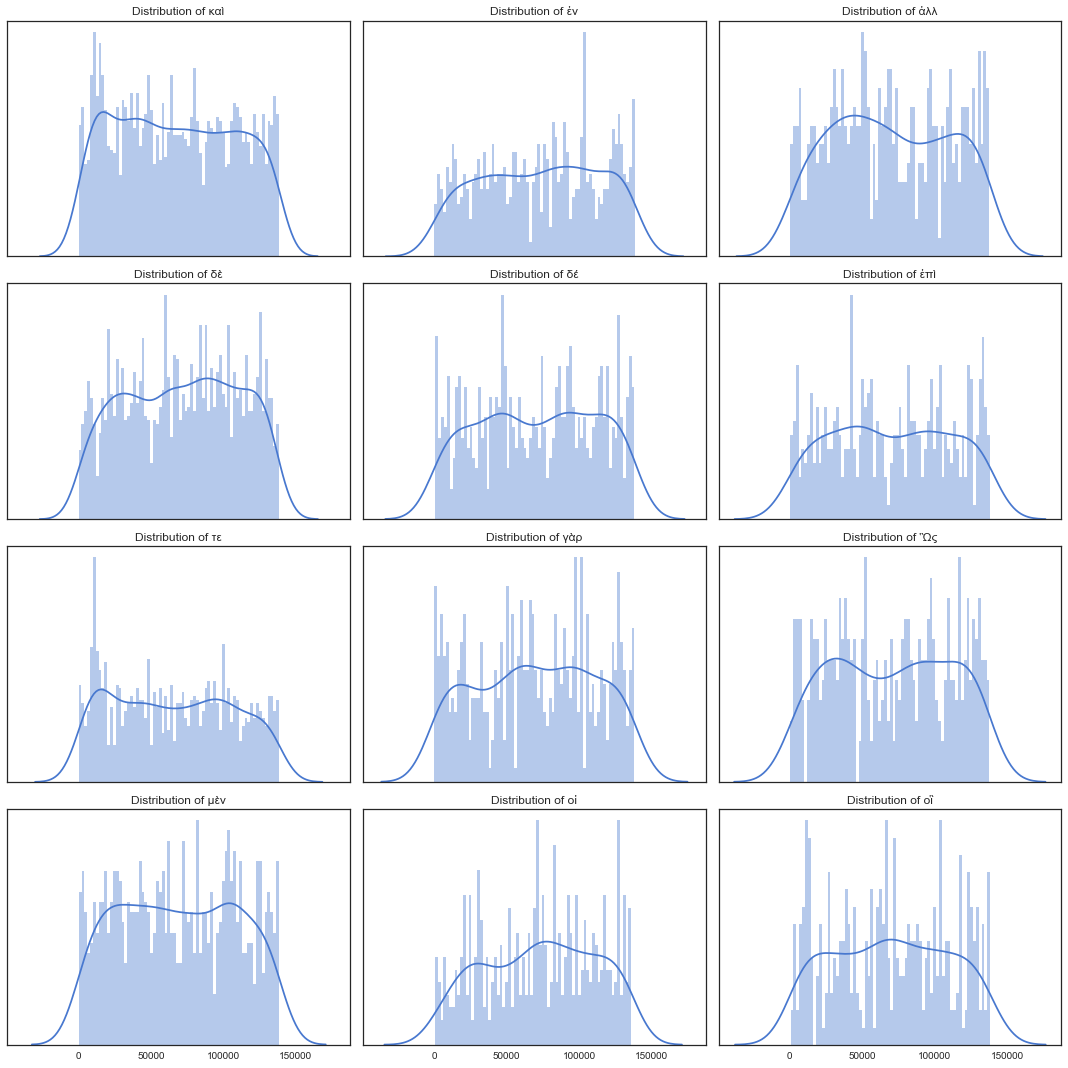

In [22]:
plt = top_words_distribution(iliad_Homer)

<Figure size 432x288 with 0 Axes>

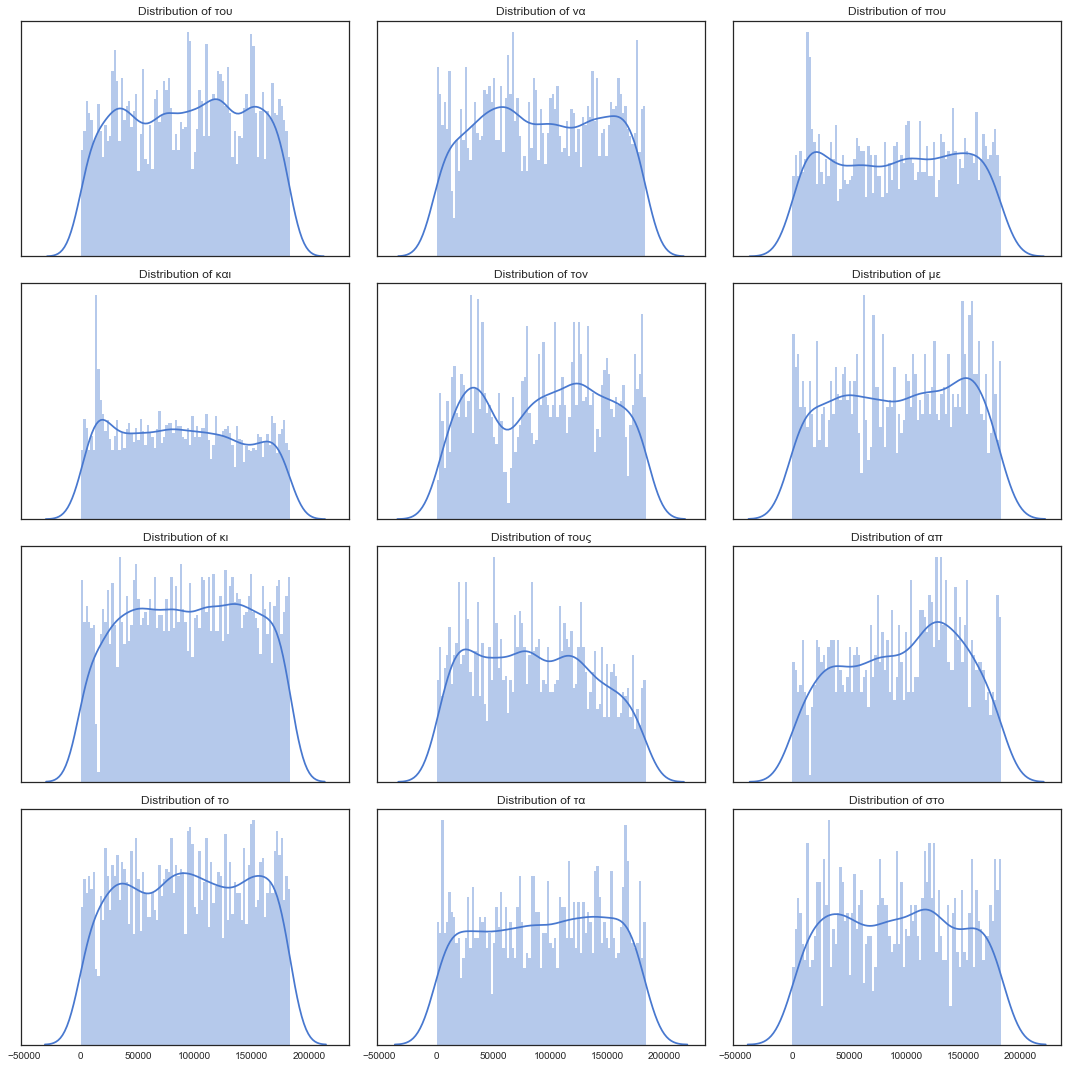

In [23]:
plt = top_words_distribution(iliad_KK)

<Figure size 432x288 with 0 Axes>

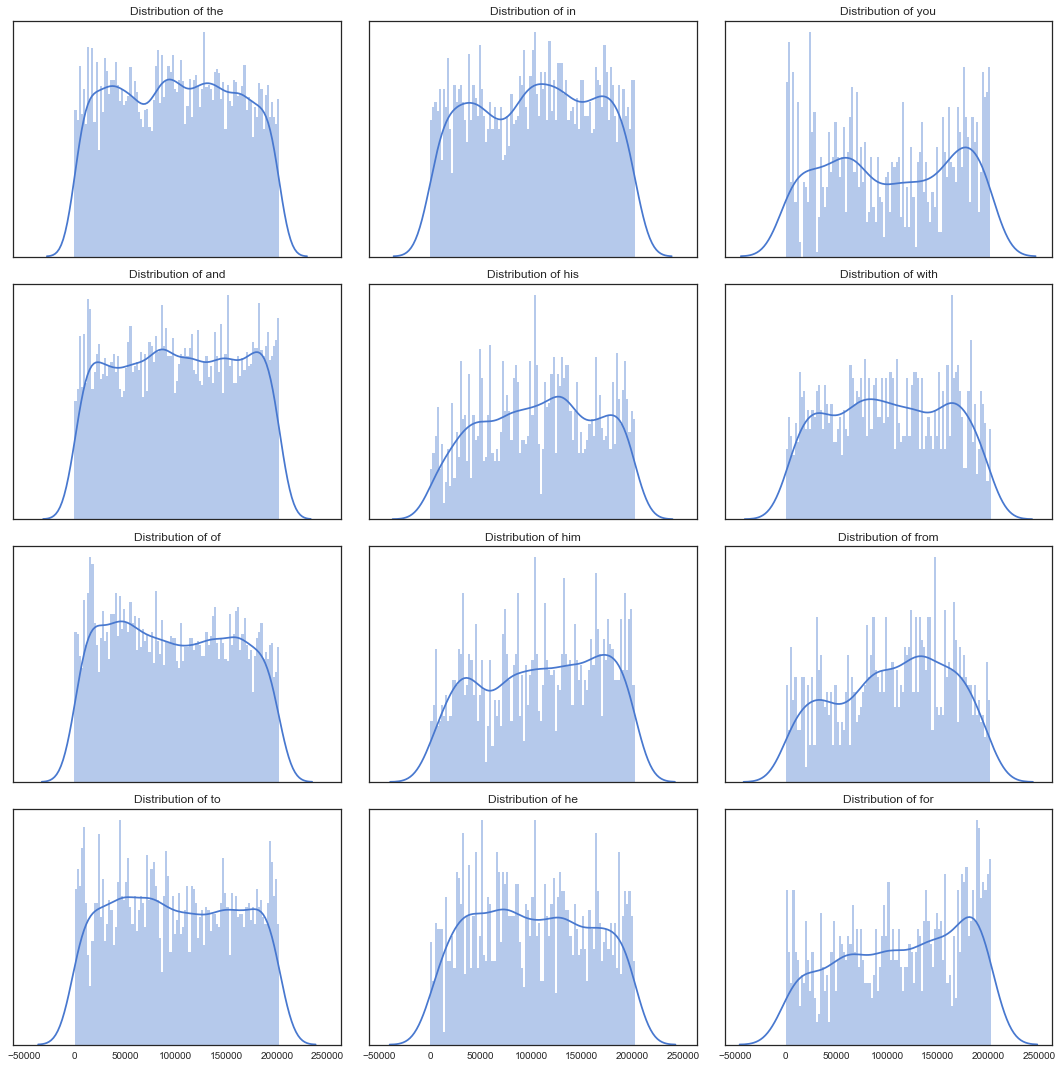

In [24]:
plt = top_words_distribution(iliad_RL)

<Figure size 432x288 with 0 Axes>

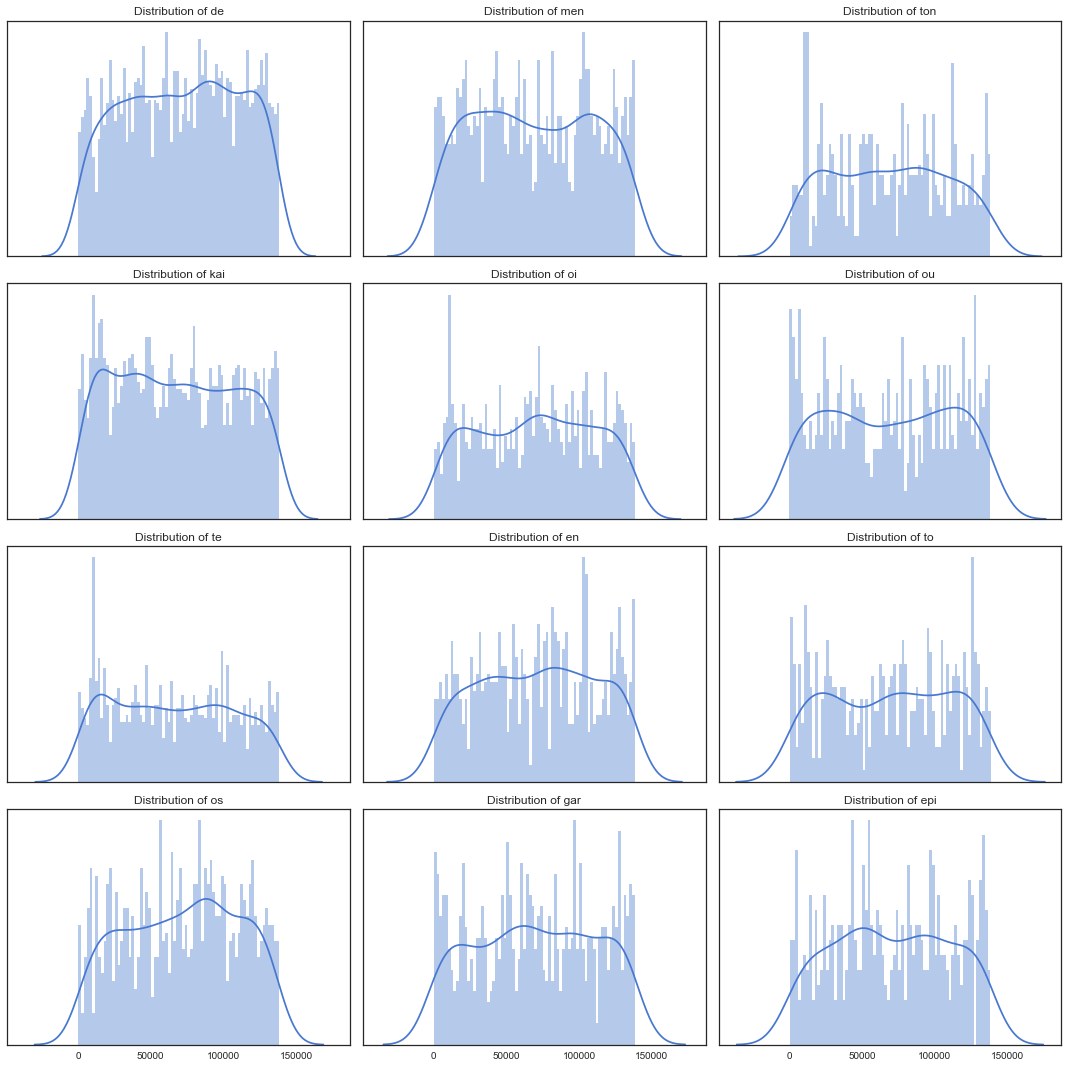

In [25]:
plt = top_words_distribution(iliad_Homer_alphabet)

## Comparison of lexicons

In [26]:
len(iliad_Homer)

690461

In [27]:
len(iliad_KK)

887015

In [28]:
len(iliad_RL)

967251

In [29]:
len(iliad_Homer_alphabet)

713340

In [30]:
def count_words(text):
    ''' Returns the word (i.e. type) count for a given text.
    
    Input:
        text(str)
    
    Output:
        count_words(pandas DataFrame): return the count for each word
    '''
        
    words = re.split('[\s\.,·:;\'—«»*]', text)
    count_words = pd.Series(words).value_counts()
    
    count_words = pd.DataFrame(count_words).rename(columns = {0:'count'})
    
    length = []
    
    for word in count_words.index:
        length.append(len(word))
        
    count_words['length'] = length
    
    return count_words

In [31]:
df_iliadH_words = count_words(iliad_Homer)
df_iliadH_words.describe()

,count,length
count,21654.000000,21654.000000
mean,6.390459,7.134063
std,184.717122,2.243561
min,1.000000,0.000000
25%,1.000000,6.000000
50%,1.000000,7.000000
75%,3.000000,9.000000
max,26518.000000,18.000000


In [32]:
df_iliadKK_words = count_words(iliad_KK)
df_iliadKK_words.describe()

,count,length
count,16858.000000,16858.000000
mean,10.883557,7.806917
std,254.104143,2.503181
min,1.000000,0.000000
25%,1.000000,6.000000
50%,1.000000,8.000000
75%,3.000000,9.000000
max,30275.000000,19.000000


In [33]:
df_iliadRL_words = count_words(iliad_RL)
df_iliadRL_words.describe()

,count,length
count,8717.000000,8717.000000
mean,23.238729,6.965240
std,307.714551,2.486043
min,1.000000,0.000000
25%,1.000000,5.000000
50%,2.000000,7.000000
75%,6.000000,8.000000
max,21154.000000,18.000000


In [34]:
df_iliadHA_words = count_words(iliad_Homer_alphabet)
df_iliadHA_words.describe()

,count,length
count,19445.000000,19445.000000
mean,7.121728,7.672975
std,197.091317,2.304096
min,1.000000,0.000000
25%,1.000000,6.000000
50%,1.000000,8.000000
75%,3.000000,9.000000
max,26583.000000,18.000000


## N-grams

In [35]:
def list_bigrams(text):
    
    words = re.split('[\s\.,·:;\'—«»*]', text)
    bigrams = []
    
    for i in range(len(words) - 1):
        if (words[i] != '') and (words[i+1] != ''):
            bigrams.append(words[i] + ' ' + words[i+1])
            
    return bigrams

In [36]:
def list_trigrams(text):
    
    words = re.split('[\s\.,·:;\'—«»*]', text)
    trigrams = []
    
    for i in range(len(words)-2):
        if (words[i] != '') and (words[i+1] != '') and (words[i+2] != ''):
            trigrams.append(words[i] + ' ' + words[i+1] + ' ' + words[i+2])
            
    return trigrams

In [37]:
def list_quadrigrams(text):
    
    words = re.split('[\s\.,·:;\'—«»*]', text)
    quadrigrams = []
    
    for i in range(len(words)-3):
        if (words[i] != '') and (words[i+1] != '') and (words[i+2] != '') and (words[i+3] != ''):
            quadrigrams.append(words[i] + ' ' + words[i+1] + ' ' + words[i+2] + ' ' + words[i+3])
            
    return quadrigrams

In [38]:
def list_pentagrams(text):
    
    words = re.split('[\s\.,·:;\'—«»*]', text)
    pentagrams = []
    
    for i in range(len(words) - 4):
        if (words[i] != '') and (words[i+1] != '') and (words[i+2] != '') and (words[i+3] != '') and (words[i+4] != ''):
            pentagrams.append(words[i] + ' ' + words[i+1] + ' ' + words[i+2] + ' ' + words[i+3] + ' ' + words[i+4])
            
    return pentagrams

In [39]:
def count_grams(text, gram = 1):
    
    if gram == 1:
        return count_words(text)
    elif gram == 2:
        grams = list_bigrams(text)
    elif gram == 3:
        grams = list_trigrams(text)
    elif gram == 4:
        grams = list_quadrigrams(text)
    elif gram == 5:
        grams = list_pentagrams(text)
    else:
        print ('Gram length should be between 1 and 5')
        return None
    
    count_grams = pd.Series(grams).value_counts()
            
    count_grams = pd.DataFrame(count_grams).rename(columns = {0:'count'})
    
    length = []
    
    for gram in count_grams.index:
        length.append(len(gram))
        
    count_grams['length'] = length
    
    return count_grams

In [40]:
count_grams(iliad_Homer, 2).describe()

,count,length
count,54685.000000,54685.000000
mean,1.570577,11.975752
std,3.109558,3.616338
min,1.000000,3.000000
25%,1.000000,9.000000
50%,1.000000,12.000000
75%,1.000000,14.000000
max,317.000000,27.000000


In [41]:
count_grams(iliad_KK, 2).describe()

,count,length
count,63043.000000,63043.000000
mean,1.982409,11.505687
std,6.351429,3.245501
min,1.000000,3.000000
25%,1.000000,9.000000
50%,1.000000,11.000000
75%,1.000000,13.000000
max,564.000000,29.000000


In [42]:
count_grams(iliad_RL, 2).describe()

,count,length
count,59557.000000,59557.000000
mean,2.691724,10.536864
std,13.271571,2.950997
min,1.000000,3.000000
25%,1.000000,8.000000
50%,1.000000,10.000000
75%,2.000000,12.000000
max,1961.000000,30.000000


In [43]:
count_grams(iliad_Homer, 3).describe()

,count,length
count,53481.000000,53481.000000
mean,1.185505,17.764982
std,0.839923,4.586754
min,1.000000,6.000000
25%,1.000000,14.000000
50%,1.000000,18.000000
75%,1.000000,21.000000
max,55.000000,36.000000


In [44]:
count_grams(iliad_KK, 3).describe()

,count,length
count,81193.000000,81193.000000
mean,1.230463,16.198552
std,1.423162,3.913521
min,1.000000,6.000000
25%,1.000000,13.000000
50%,1.000000,16.000000
75%,1.000000,19.000000
max,196.000000,38.000000


In [45]:
count_grams(iliad_RL, 3).describe()

,count,length
count,101412.000000,101412.000000
mean,1.386355,14.839161
std,2.254007,3.403969
min,1.000000,6.000000
25%,1.000000,12.000000
50%,1.000000,14.000000
75%,1.000000,17.000000
max,267.000000,37.000000


In [46]:
count_grams(iliad_Homer, 4).describe()

,count,length
count,42694.000000,42694.000000
mean,1.107954,23.970792
std,0.518495,5.256182
min,1.000000,9.000000
25%,1.000000,20.000000
50%,1.000000,24.000000
75%,1.000000,28.000000
max,24.000000,46.000000


In [47]:
count_grams(iliad_KK, 4).describe()

,count,length
count,71291.000000,71291.000000
mean,1.098133,21.607061
std,0.608416,4.506176
min,1.000000,9.000000
25%,1.000000,18.000000
50%,1.000000,21.000000
75%,1.000000,24.000000
max,52.000000,46.000000


In [48]:
count_grams(iliad_RL, 4).describe()

,count,length
count,106542.000000,106542.000000
mean,1.147763,19.711766
std,0.964169,3.881058
min,1.000000,9.000000
25%,1.000000,17.000000
50%,1.000000,19.000000
75%,1.000000,22.000000
max,126.000000,44.000000


In [49]:
count_grams(iliad_Homer, 5).describe()

,count,length
count,31787.000000,31787.000000
mean,1.077673,30.153836
std,0.410690,5.770664
min,1.000000,13.000000
25%,1.000000,26.000000
50%,1.000000,30.000000
75%,1.000000,34.000000
max,15.000000,56.000000


In [50]:
count_grams(iliad_KK, 5).describe()

,count,length
count,56415.000000,56415.000000
mean,1.061473,27.236870
std,0.374659,4.960534
min,1.000000,12.000000
25%,1.000000,24.000000
50%,1.000000,27.000000
75%,1.000000,30.000000
max,24.000000,51.000000


In [51]:
count_grams(iliad_RL, 5).describe()

,count,length
count,97333.000000,97333.00000
mean,1.084535,24.75216
std,0.524680,4.30948
min,1.000000,13.00000
25%,1.000000,22.00000
50%,1.000000,24.00000
75%,1.000000,27.00000
max,42.000000,48.00000


## Scaling up the statistical approach to the whole text

In [52]:
count_words(iliad_Homer)

,count,length
,26518,0
δ,3672,1
καὶ,2596,3
δὲ,2036,2
τε,1507,2
μὲν,934,3
ἐν,788,2
δέ,711,2
τ,599,1
γὰρ,550,3


In [53]:
words = count_words(iliad_Homer)
spans = []
    
for i in range(len(words)):
    spans.append(search_all_span(words.index[i], iliad_Homer))

In [54]:
def distribution_stats(word, text, total_words, bins, x, df):
    
    span = search_all_span(word, text)
    span = pd.DataFrame(span, np.arange(len(span))).rename(columns = {0: 'place'})
        
    y = []
        
    for j in range(bins):
        serie = span[span['place'] <= x[j+1]]
        serie = serie[serie['place'] > x[j]]
        y.append(len(serie)*bins / total_words)
        
    mean = np.mean(y)
    std = np.std(y)
    
    return mean, std

In [55]:
def enrich_distribution_stats(text, df):
    
    total_words = np.sum(words['count']) - words.loc['']['count']
    bins = int(np.ceil(len(text)/10000))
    x = np.linspace(0, len(text), bins+1)
    
    mean, std = [], []
        
    for ind, row in df.iterrows():
        
        if (ind != '') and (row['count'] >= bins):
            mean_, std_ = distribution_stats(ind, text, total_words, bins, x, df)
            mean.append(mean_)
            std.append(std_)
            
        else:
            mean.append(np.nan)
            std.append(np.nan)
        
    df['mean_occurence'] = mean
    df['std_occurence'] = std
    
    return df

In [56]:
df_iliadH_words = enrich_distribution_stats(iliad_Homer, df_iliadH_words)
df_iliadKK_words = enrich_distribution_stats(iliad_KK, df_iliadKK_words)
df_iliadRL_words = enrich_distribution_stats(iliad_RL, df_iliadRL_words)
df_iliadHA_words = enrich_distribution_stats(iliad_Homer_alphabet, df_iliadHA_words)

In [57]:
df_iliadH_words.head(10)

,count,length,mean_occurence,std_occurence
,26518,0,NaN,NaN
δ,3672,1,0.032826,0.065927
καὶ,2596,3,0.023207,0.046828
δὲ,2036,2,0.018201,0.036750
τε,1507,2,0.013472,0.027718
μὲν,934,3,0.008350,0.016870
ἐν,788,2,0.007044,0.014295
δέ,711,2,0.006356,0.012965
τ,599,1,0.005355,0.011268
γὰρ,550,3,0.004917,0.010096


In [58]:
df_iliadKK_words.head(10)

,count,length,mean_occurence,std_occurence
,30275,0,NaN,NaN
του,5502,3,0.049186,0.096579
και,4988,3,0.044591,0.087883
κι,4689,2,0.041918,0.081758
το,4156,2,0.037153,0.072629
ο,3672,1,0.032826,0.064487
να,3147,2,0.028133,0.055207
τον,2681,3,0.023967,0.047509
τους,2549,4,0.022787,0.045518
τα,2127,2,0.019015,0.037319


In [59]:
df_iliadRL_words.head(10)

,count,length,mean_occurence,std_occurence
,21154,0,NaN,NaN
the,13602,3,0.121597,0.235741
and,7954,3,0.071106,0.137178
of,6279,2,0.056132,0.109328
to,3941,2,0.035231,0.068753
in,3424,2,0.030609,0.059379
his,2370,3,0.021187,0.042465
him,2094,3,0.018720,0.037427
a,2080,1,0.018595,0.036364
he,1866,2,0.016681,0.032836


In [60]:
df_iliadH_words.describe()

,count,length,mean_occurence,std_occurence
count,21654.000000,21654.000000,193.000000,193.000000
mean,6.390459,7.134063,0.001956,0.004197
std,184.717122,2.243561,0.003303,0.006623
min,1.000000,0.000000,0.000626,0.001379
25%,1.000000,6.000000,0.000805,0.001888
50%,1.000000,7.000000,0.001100,0.002435
75%,3.000000,9.000000,0.001949,0.004173
max,26518.000000,18.000000,0.032826,0.065927


In [61]:
df_iliadKK_words.describe()

,count,length,mean_occurence,std_occurence
count,16858.000000,16858.000000,192.000000,192.000000
mean,10.883557,7.806917,0.004101,0.008421
std,254.104143,2.503181,0.007435,0.014546
min,1.000000,0.000000,0.000805,0.001754
25%,1.000000,6.000000,0.001035,0.002299
50%,1.000000,8.000000,0.001560,0.003486
75%,3.000000,9.000000,0.003073,0.006383
max,30275.000000,19.000000,0.049186,0.096579


In [62]:
df_iliadRL_words.describe()

,count,length,mean_occurence,std_occurence
count,8717.000000,8717.000000,265.000000,265.000000
mean,23.238729,6.965240,0.004229,0.008769
std,307.714551,2.486043,0.009866,0.019097
min,1.000000,0.000000,0.000867,0.001886
25%,1.000000,5.000000,0.001234,0.002901
50%,2.000000,7.000000,0.001743,0.004014
75%,6.000000,8.000000,0.003764,0.007938
max,21154.000000,18.000000,0.121597,0.235741


In [63]:
df_iliadH_words[:50].describe()

,count,length,mean_occurence,std_occurence
count,50.000000,50.000000,49.000000,49.000000
mean,1044.500000,2.540000,0.004690,0.009666
std,3730.690642,1.053856,0.005748,0.011527
min,218.000000,0.000000,0.001949,0.004111
25%,251.750000,2.000000,0.002235,0.004630
50%,322.500000,2.500000,0.002861,0.006044
75%,469.250000,3.000000,0.003960,0.008031
max,26518.000000,6.000000,0.032826,0.065927


In [64]:
df_iliadKK_words[:50].describe()

,count,length,mean_occurence,std_occurence
count,50.000000,50.000000,49.000000,49.000000
mean,1915.240000,2.800000,0.011948,0.023800
std,4289.351897,1.160577,0.011601,0.022655
min,342.000000,0.000000,0.003057,0.006343
25%,553.500000,2.000000,0.004944,0.010038
50%,819.500000,3.000000,0.007152,0.014402
75%,1488.750000,3.000000,0.012954,0.026473
max,30275.000000,7.000000,0.049186,0.096579


In [65]:
df_iliadRL_words[:50].describe()

,count,length,mean_occurence,std_occurence
count,50.000000,50.000000,49.000000,49.000000
mean,2008.480000,2.940000,0.014462,0.028732
std,3539.879188,1.268295,0.019989,0.038565
min,569.000000,0.000000,0.005087,0.010205
25%,658.000000,2.000000,0.005811,0.012570
50%,968.000000,3.000000,0.008600,0.017247
75%,1322.750000,4.000000,0.011577,0.023258
max,21154.000000,8.000000,0.121597,0.235741


## Extraction of proper nouns

In [66]:
def isolate_nouns(df):
    
    capitalized, uncapitalized, nouns = [], [], []
    
    for ind, row in df[1:].iterrows():
        if (ind[0].isupper()):
            capitalized.append(ind)
        else:
            uncapitalized.append(ind)
    
    for i in range(len(capitalized)):
        if not(capitalized[i].lower() in uncapitalized):
            nouns.append(capitalized[i])
    
    df_nouns = df.loc[nouns]
    df_nouns = df_nouns[df_nouns['length'] > 2]
    
    return df_nouns

In [67]:
df_nouns = isolate_nouns(df_iliadH_words)
df_nouns_alphabet = isolate_nouns(df_iliadHA_words)

In [68]:
len(df_nouns)

2048

In [69]:
len(df_nouns_alphabet)

1968

In [70]:
df_nouns.head(12)

,count,length,mean_occurence,std_occurence
Ἀχαιῶν,320,6,0.002861,0.006593
Ἕκτωρ,202,5,0.001806,0.004471
Τρώων,196,5,0.001752,0.003850
Διὸς,162,4,0.001448,0.003256
Τρῶες,129,5,0.001153,0.002579
Ζεὺς,120,4,0.001073,0.002342
Ἀγαμέμνων,98,9,0.000876,0.002373
Ἀπόλλων,97,7,0.000867,0.002242
Ἀχαιοὶ,97,6,0.000867,0.001985
Ἥρη,96,3,0.000858,0.002472


In [71]:
df_nouns_alphabet.head(12)

,count,length,mean_occurence,std_occurence
Akhaion,320,7,0.002861,0.006728
Ektor,250,5,0.002235,0.005587
Troon,196,5,0.001752,0.003932
Akhilleus,171,9,0.001529,0.004501
Zeus,166,4,0.001484,0.003239
Akhaioi,162,7,0.001448,0.003218
Troes,138,5,0.001234,0.002805
Agamemnon,108,9,0.000965,0.002667
Ere,104,3,0.000930,0.002739
Apollon,101,7,0.000903,0.002335


## Tracking epithetes

In [72]:
def track_repeated_epithetes(text, nouns, n, repetition = 2):
    
    epithetes = []
    parasite = ['καὶ', 'δ', 'μετὰ', 'ἐν', 'ἐπὶ', 'οἱ', 'τ', 'τε', 'δὲ', 'ὑπ', 'ὣς']
    
    grams = count_grams(text, n)
    grams = grams[grams['count'] > repetition]
    
    for ind, row in grams.iterrows():
        words = re.split('[\s\.,·:;\'—«»*]', ind)
        
        clean = True
        for i in range(len(words)):
            if words[i] in parasite:
                clean = False
                
        if clean:
            for i in range(len(words)):
                if (words[i] in nouns) and not(ind in epithetes):
                    epithetes.append(ind)
    
    return epithetes

In [73]:
track_repeated_epithetes(iliad_Homer_alphabet, df_nouns_alphabet.index, 2, repetition = 12)

['dios Akhilleus',
 'andron Agamemnon',
 'kreion Agamemnon',
 'koruthaiolos Ektor',
 'neas Akhaion',
 'okus Akhilleus',
 'Ektor d',
 'uies Akhaion',
 'Phoibos Apollon',
 'phaidimos Ektor',
 'glaukopis Athene',
 'Troes kai',
 'Ektora dion',
 'potnia Ere',
 'Pallas Athene',
 'dios Odusseus',
 'agathos Diomedes',
 'autar Akhilleus',
 'ippota Nestor',
 'nephelegereta Zeus',
 'leukolenos Ere',
 'Akhaion khalkokhitonon',
 'Gerenios ippota',
 'Telamonios Aias',
 'uias Akhaion',
 'laon Akhaion',
 'Zeu pater',
 'krateros Diomedes',
 'Aias d',
 'proti Ilion',
 'okea Iris',
 'kai Akhaion',
 'komoontes Akhaioi',
 'euknemides Akhaioi',
 'Troon kai',
 'Dii patri',
 'metieta Zeus',
 'Troas kai',
 'kai Ektori',
 'Poseidaon enosikhthon',
 'polumetis Odusseus',
 'Patroklos d',
 'Troes de',
 'euknemidas Akhaious',
 'Ektor de',
 'neusin Akhaion',
 'Ektora d',
 'xanthos Menelaos',
 'de Zeus',
 'Ilion iren',
 'Tudeos uios']

In [74]:
track_repeated_epithetes(iliad_Homer_alphabet, df_nouns_alphabet.index, 3, repetition = 10)

['anax andron Agamemnon',
 'podas okus Akhilleus',
 'epi neas Akhaion',
 'Gerenios ippota Nestor',
 'boen agathos Diomedes',
 'podarkes dios Akhilleus',
 'thea leukolenos Ere',
 'thea glaukopis Athene',
 'kare komoontes Akhaioi',
 'prosephe nephelegereta Zeus',
 'boopis potnia Ere',
 'megas koruthaiolos Ektor',
 'Troon kai Akhaion',
 'megas Telamonios Aias',
 'boen agathos Menelaos',
 'euru kreion Agamemnon']

In [75]:
track_repeated_epithetes(iliad_Homer_alphabet, df_nouns_alphabet.index, 4, repetition = 6)

['prosephe podas okus Akhilleus',
 'thoas epi neas Akhaion',
 'AtreIdes euru kreion Agamemnon',
 'Argeion egetores ede medontes',
 'epeita Gerenios ippota Nestor',
 'philoi Argeion egetores ede',
 'o philoi Argeion egetores',
 'AtreIde kudiste anax andron',
 'kai muthon en Argeioisin',
 'apameibomenos prosephe nephelegereta Zeus',
 'muthon en Argeioisin eeipen',
 'kudiste anax andron Agamemnon',
 'epeita boopis potnia Ere',
 'Troes kai Lukioi kai',
 'Athenaie te kai Ere',
 'keklute meu Troes kai']

In [76]:
track_repeated_epithetes(iliad_Homer_alphabet, df_nouns_alphabet.index, 5, repetition = 6)

['apameibomenos prosephe podas okus Akhilleus',
 'AtreIde kudiste anax andron Agamemnon',
 'kai muthon en Argeioisin eeipen',
 'philoi Argeion egetores ede medontes',
 'o philoi Argeion egetores ede',
 'orthos kai muthon en Argeioisin']

In [77]:
track_repeated_epithetes(iliad_Homer_alphabet, df_nouns_alphabet.index, 3, repetition = 6)

['anax andron Agamemnon',
 'podas okus Akhilleus',
 'epi neas Akhaion',
 'Gerenios ippota Nestor',
 'boen agathos Diomedes',
 'podarkes dios Akhilleus',
 'thea leukolenos Ere',
 'thea glaukopis Athene',
 'kare komoontes Akhaioi',
 'prosephe nephelegereta Zeus',
 'boopis potnia Ere',
 'megas koruthaiolos Ektor',
 'Troon kai Akhaion',
 'megas Telamonios Aias',
 'boen agathos Menelaos',
 'euru kreion Agamemnon',
 'prosephe krateros Diomedes',
 'AtreIdes euru kreion',
 'prosephe koruthaiolos Ektor',
 'podenemos okea Iris',
 'kare komoontas Akhaious',
 'Argeion egetores ede',
 'podas okea Iris',
 'epi neusin Akhaion',
 'o philoi Argeion',
 'AtreIde kudiste anax',
 'en Argeioisin eeipen',
 'muthon en Argeioisin',
 'te kai Ere',
 'Menoitiou alkimos uios',
 'prosephe kreion Agamemnon',
 'straton eurun Akhaion',
 'Athenaie te kai',
 'epeita Gerenios ippota',
 'philoi Argeion egetores',
 'prosephe polumetis Odusseus',
 'Dios thugater Aphrodite',
 'Trosi te kai',
 'keklute meu Troes',
 'kai neas 

In [78]:
def type_token_ratio(text, n_sample = 100, tokens = 1000):
    ''' Compute the type-token ratio (TTK) of a text, on n samples of same token length.
    
    Inputs:
        text(str): text/corpus
        n_sample(int): number of repeated measures
        tokens(int): number of tokens (words) of each TTK measure
    
    Output:
        type_token_ratio(list<float>): list of the TTK measures
    '''
    
    words_ = re.split('[\s\.,·:;\'—«»*]', text)
    words, type_token_ratio = [], []
    
    for word_ in words_:
        if word_ != '':
            words.append(word_)
        
    distribution = np.random.uniform(0, len(words) - tokens, n_sample).astype('int')
    
    for random in distribution :
        
        range_ = words[random:random + tokens]
        
        sample = ''
        for word in range_:
            sample += word + ' '
        
        type_ = len(count_words(sample)) - 1
        type_token_ratio.append(type_ / tokens)
        
    return type_token_ratio
    

In [79]:
TTR_Homer = type_token_ratio(iliad_Homer)
TTR_Homer_alphabet = type_token_ratio(iliad_Homer_alphabet)
TTR_KK = type_token_ratio(iliad_KK)
TTR_RL = type_token_ratio(iliad_RL)

In [80]:
sns.set(rc={'figure.figsize':(12,9)})
sns.set_style("ticks")

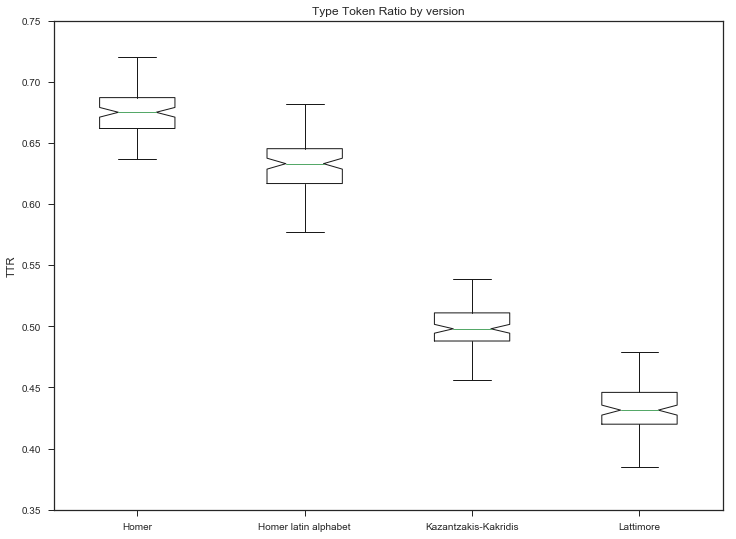

In [81]:
plt.boxplot([TTR_Homer, TTR_Homer_alphabet, TTR_KK, TTR_RL], notch = True);

plt.xticks([1,2,3, 4], np.array(['Homer', 'Homer latin alphabet', 'Kazantzakis-Kakridis', 'Lattimore']))
plt.ylabel('TTR');
plt.ylim((.35,.75))
plt.title('Type Token Ratio by version');
plt.show()

In [82]:
declensions = [
    ['ά', 'άν', 'ᾶς', 'ᾷ', 'αί', 'άς', 'ῶν', 'αῖς'], # 1st
    ['η', 'ην', 'ης', 'ῃ', 'αι', 'αις', 'ας', 'ῶν'], # 1st
    ['α', 'αν', 'ης', 'ῃ', 'αι', 'αις', 'ας', 'ῶν'], # 1st
    ['ας', 'α', 'αν', 'ου', 'ᾳ', 'αι', 'ας', 'ῶν', 'αις'], # 1st
    ['ης', 'α', 'ην', 'ου', 'ῃ', 'αι', 'ας', 'ων', 'αις'], # 1st
    ['ος', 'ε', 'ον', 'ου', 'ῳ', 'οι', 'ους', 'ων', 'οις'], # 2nd
    ['ον', 'ου', 'ῳ', 'α', 'ων', 'οις'], # 2nd
    ['ς', 'α', 'ος', 'ι', 'ες', 'ας', 'ων', 'σι'], # 3rd
    ['ς', 'ος', 'ι', 'α', 'ων', 'σι']] # 3rd

In [83]:
def endwith(word, suffix):
    
    length_suffix = len(suffix)
    
    if word[-len(suffix):] == suffix:
        return True
    
    else:
        return False

In [168]:
def fast_lemmatize(text, language = 'gr'):
    
    words = re.split('[\s\.,·:;\'—«»*><]', text)
    words_ = []
    
    declensions = ['a', 'an', 'as', 'ai', 'on', 'ais', 'e', 'en', 'es', 'ou', 'os', 'eo', 'oi', 'ous',
                   'ois', 'si', 'eus']
            
    for i in range(len(words)):
        
        rooted = False
        
        if language == 'gr':
            if len(words[i]) >= 3:
                for declension in declensions:
                    if endwith(words[i], declension) and (rooted == False):
                    
                        words_.append(words[i][:-len(declension)])
                        rooted = True
            
        if rooted == False:
            
            if (endwith(words[i], 'i') or endwith(words[i], 's') or endwith(words[i], 'o')) and len(words[i]) >= 3:
                words_.append(words[i][:-1])
                rooted = True
                    
            else:
                words_.append(words[i])
    
    text_ = ''
    
    for word in words_:
        text_ += word + ' '
        
    text_ = text_.replace('  ', ' ')
    
    return text_

In [169]:
text_RL = fast_lemmatize(iliad_RL, language = 'en')

In [160]:
iliad_KK_alphabet = unidecode.unidecode(iliad_KK)

In [161]:
text_ = fast_lemmatize(iliad_Homer_alphabet)
text_KK = fast_lemmatize(iliad_KK)

In [156]:
text_[:10000]

' Menin aeid the Peleiad Akhile oulomen e mur Akhai alg ethek poll d iphthim psukh Aid proIaps ero aut de elori teukh kunessin oionoi taw pa Di d eteleiet boul enwxr ou de ta prot diastet erisant AtreId taw anant andr k diorwsi Akhill Ti gar spho the erid xuneek makhesth Let k Di ui o gar basile kholothei nous an strat wrr kak olekont de la ounek t Khrus etimas areter AtreId o gar elth tho ep ne Akhai lusomen taw thugatr pher t aperei apoimwzw stemmat ekh emyuxwsi khersin ekebol Apollon khrus an skeptr k lisset pant Akhai AtreId de malist du kosmetor la  AtreId taw k all euknemid Akhai umin m the doi Olumpi domat ekhont ekpers Priamoi polin eu d oikad ikesth paid d em lusait phil ta d apoimwzw dekhesth azomen Di ui ekebol Apollon  Enth all m pant epeuphemes Akhai aideisth th iere k agla dekhth apoimwzw all ouitoul AtreId Agamemnon endan thum all kak aphie krater d ep muth etell  Me se ger koilesin eg par neu kikhei e numfwn dethunont e usteromuq autik iont me nu toq ou khraism skaptr k

In [89]:
iliad_Homer_alphabet

" Menin aeide, thea, Peleiadeo Akhileos oulomenen, e muri' Akhaiois alge' etheke, pollas d' iphthimous psukhas Aidi proIapsen eroon, autous de eloria teukhe kunessin oionoisi te pasi* Dios d' eteleieto boule* ex ou de ta prota diasteten erisante AtreIdes te anax andron kai dios Akhilleus. Tis gar sphoe theon eridi xuneeke makhesthai; Letous kai Dios uios* o gar basilei kholotheis nouson ana straton orse kaken, olekonto de laoi, ouneka ton Khrusen etimasen aretera AtreIdes* o gar elthe thoas epi neas Akhaion lusomenos te thugatra pheron t' apereisi' apoina, stemmat' ekhon en khersin ekebolou Apollonos khruseo ana skeptro, kai lisseto pantas Akhaious, AtreIda de malista duo, kosmetore laon* <<AtreIdai te kai alloi euknemides Akhaioi, umin men theoi doien Olumpia domat' ekhontes ekpersai Priamoio polin, eu d' oikad' ikesthai* paida d' emoi lusaite philen, ta d' apoina dekhesthai, azomenoi Dios uion ekebolon Apollona.>> Enth' alloi men pantes epeuphemesan Akhaioi aideisthai th' ierea kai a

In [90]:
iliad_Homer[:1000]

" Μῆνιν ἄειδε, θεά, Πηληιάδεω Ἀχιλῆος οὐλομένην, ἣ μυρί’ Ἀχαιοῖς ἄλγε’ ἔθηκε, πολλὰς δ’ ἰφθίμους ψυχὰς Ἄϊδι προΐαψεν ἡρώων, αὐτοὺς δὲ ἑλώρια τεῦχε κύνεσσιν οἰωνοῖσί τε πᾶσι· Διὸς δ’ ἐτελείετο βουλή· ἐξ οὗ δὴ τὰ πρῶτα διαστήτην ἐρίσαντε Ἀτρεΐδης τε ἄναξ ἀνδρῶν καὶ δῖος Ἀχιλλεύς. Τίς γάρ σφωε θεῶν ἔριδι ξυνέηκε μάχεσθαι; Λητοῦς καὶ Διὸς υἱός· ὃ γὰρ βασιλῆι χολωθεὶς νοῦσον ἀνὰ στρατὸν ὦρσε κακήν, ὀλέκοντο δὲ λαοί, οὕνεκα τὸν Χρύσην ἠτίμασεν ἀρητῆρα Ἀτρεΐδης· ὃ γὰρ ἦλθε θοὰς ἐπὶ νῆας Ἀχαιῶν λυσόμενός τε θύγατρα φέρων τ’ ἀπερείσι’ ἄποινα, στέμματ' ἔχων ἐν χερσὶν ἑκηβόλου Ἀπόλλωνος χρυσέῳ ἀνὰ σκήπτρῳ, καὶ λίσσετο πάντας Ἀχαιούς, Ἀτρεΐδα δὲ μάλιστα δύω, κοσμήτορε λαῶν· «Ἀτρεΐδαι τε καὶ ἄλλοι ἐϋκνήμιδες Ἀχαιοί, ὑμῖν μὲν θεοὶ δοῖεν Ὀλύμπια δώματ’ ἔχοντες ἐκπέρσαι Πριάμοιο πόλιν, εὖ δ’ οἴκαδ’ ἱκέσθαι· παῖδα δ' ἐμοὶ λύσαιτε φίλην, τὰ δ’ ἄποινα δέχεσθαι, ἁζόμενοι Διὸς υἱὸν ἑκηβόλον Ἀπόλλωνα.» Ἔνθ' ἄλλοι μὲν πάντες ἐπευφήμησαν Ἀχαιοὶ αἰδεῖσθαί θ’ ἱερῆα καὶ ἀγλαὰ δέχθαι ἄποινα· ἀλλ' οὐκ Ἀτρεΐδῃ Ἀγαμ

In [91]:
TTR_H_lem = type_token_ratio(text_)

In [92]:
sns.set(rc={'figure.figsize':(12,9)})
sns.set_style("ticks")

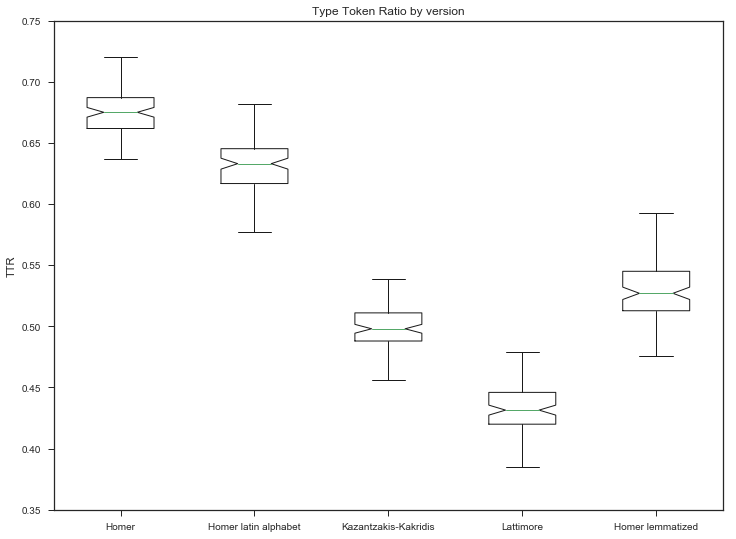

In [93]:
plt.boxplot([TTR_Homer, TTR_Homer_alphabet, TTR_KK, TTR_RL, TTR_H_lem], notch = True);

plt.xticks([1,2,3,4,5], np.array(['Homer', 'Homer latin alphabet', 
                                 'Kazantzakis-Kakridis', 'Lattimore',
                                 'Homer lemmatized']))
plt.ylabel('TTR');
plt.ylim((.35,.75))
plt.title('Type Token Ratio by version');
plt.show()

In [11]:
df_lemmatizer = pd.read_csv('lemmatizer.csv', delimiter = ':')

In [12]:
df_lemmatizer.head(20)

,transcript,id,form1,form2,form3;
0,a,0,Α,ᾠώδης,ἀ–;
1,a,144,ἀ–,Α,ἁ–;
2,a,2045,ἁ–,ἀ–,ἀ–;
3,a,2098,ἀ–,ἁ–,ἆ;
4,a,2318,ἆ,ἀ–,ἃ ἅ;
5,a,3065,ἃ ἅ,ἆ,ἇ ἇ;
6,a,3252,ἇ ἇ,ἃ ἅ,ἄα;
7,aa,3273,ἄα,ἇ ἇ,ἀάατος;
8,aaatos,3358,ἀάατος,ἄα,ἀάβακτοι;
9,aabaktoi,3768,ἀάβακτοι,ἀάατος,ἀάβηκτον;


In [7]:
len(df_lemmatizer)

127686

In [8]:
df_lemmatizer = df_lemmatizer.rename(columns = {'form3;':'form3'})

In [9]:
for ind, row in df_lemmatizer.iterrows():
    df_lemmatizer['form3'][ind] = row['form3'][:-1]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


KeyboardInterrupt: 

In [ ]:
df_lemmatizer.index = df_lemmatizer['id']
df_lemmatizer = df_lemmatizer.drop(columns = ['id'])

In [ ]:
df_lemmatizer.head(10)

In [ ]:
df_lemmatizer.to_csv('lemmatizer_.csv', index = True)
df_lemmatizer = pd.read_csv('lemmatizer_.csv')
df_lemmatizer.head(20)

In [128]:
df_lemmatizer = df_lemmatizer.dropna()

In [129]:
len(df_lemmatizer)

127683

In [140]:
words = re.split('[\s\.,·:;\'—«»*><]', iliad_Homer)
iliad_Homer_lem = ' '
for word in words:
    iliad_Homer_lem += word + ' '

In [141]:
for ind, row in df_lemmatizer.iterrows():
    iliad_Homer_lem = iliad_Homer_lem.replace(' ' + row['form3'] + ' ', ' ' + row['transcript'] + ' ')
    iliad_Homer_lem = iliad_Homer_lem.replace(' ' + row['form2'] + ' ', ' ' + row['transcript'] + ' ')
    iliad_Homer_lem = iliad_Homer_lem.replace(' ' + row['form1'] + ' ', ' ' + row['transcript'] + ' ')

In [150]:
iliad_Homer_lem[:1000]

'  Μῆνιν ἄειδε  θεά  Πηληιάδεω Ἀχιλῆος οὐλομένην  ἣ μυρί’ Ἀχαιοῖς ἄλγε’ ἔθηκε  πολλὰς δ’ ἰφθίμους ψυχὰς Ἄϊδι προΐαψεν ἡρώων  αὐτοὺς δὲ ἑλώρια τεῦχε κύνεσσιν οἰωνοῖσί taws πᾶσι  Διὸς δ’ ἐτελείετο βουλή  enwxros ou δὴ τὰ πρῶτα διαστήτην ἐρίσαντε Ἀτρεΐδης taws anantos ἀνδρῶν καὶ diorwsis Ἀχιλλεύς  Τίς γάρ σφωε θεῶν ἔριδι ξυνέηκε μάχεσθαι  Λητοῦς καὶ Διὸς υἱός  ὃ γὰρ βασιλῆι χολωθεὶς νοῦσον ἀνὰ στρατὸν wrra κακήν  ὀλέκοντο δὲ λαοί  ouneken τὸν Χρύσην ἠτίμασεν ἀρητῆρα Ἀτρεΐδης  ὃ γὰρ ἦλθε θοὰς ἐπὶ νῆας Ἀχαιῶν λυσόμενός taws θύγατρα φέρων t ἀπερείσι’ apoimwzw  στέμματ  ἔχων emyuxwsis χερσὶν ἑκηβόλου Ἀπόλλωνος χρυσέῳ ἀνὰ σκήπτρῳ  καὶ λίσσετο πάντας Ἀχαιούς  Ἀτρεΐδα δὲ μάλιστα δύω  κοσμήτορε λαῶν   Ἀτρεΐδαι taws καὶ ἄλλοι ἐϋκνήμιδες Ἀχαιοί  ὑμῖν μὲν θεοὶ δοῖεν Ὀλύμπια δώματ’ ἔχοντες ἐκπέρσαι Πριάμοιο πόλιν  eu δ’ οἴκαδ’ ἱκέσθαι  παῖδα δ  ἐμοὶ λύσαιτε φίλην  τὰ δ’ apoimwzw δέχεσθαι  ἁζόμενοι Διὸς υἱὸν ἑκηβόλον Ἀπόλλωνα   Ἔνθ  ἄλλοι μὲν πάντες ἐπευφήμησαν Ἀχαιοὶ αἰδεῖσθαί θ’ ἱερῆα καὶ ἀγλαὰ δέχθ

In [151]:
iliad_Homer_alphabet = unidecode.unidecode(iliad_Homer_lem)

In [153]:
f = open("iliad_Homer_alphabet.txt","w+")
f.write(iliad_Homer_alphabet)
f.close()

In [152]:
iliad_Homer_alphabet[:1000]

"  Menin aeide  thea  Peleiadeo Akhileos oulomenen  e muri' Akhaiois alge' etheke  pollas d' iphthimous psukhas Aidi proIapsen eroon  autous de eloria teukhe kunessin oionoisi taws pasi  Dios d' eteleieto boule  enwxros ou de ta prota diasteten erisante AtreIdes taws anantos andron kai diorwsis Akhilleus  Tis gar sphoe theon eridi xuneeke makhesthai  Letous kai Dios uios  o gar basilei kholotheis nouson ana straton wrra kaken  olekonto de laoi  ouneken ton Khrusen etimasen aretera AtreIdes  o gar elthe thoas epi neas Akhaion lusomenos taws thugatra pheron t apereisi' apoimwzw  stemmat  ekhon emyuxwsis khersin ekebolou Apollonos khruseo ana skeptro  kai lisseto pantas Akhaious  AtreIda de malista duo  kosmetore laon   AtreIdai taws kai alloi euknemides Akhaioi  umin men theoi doien Olumpia domat' ekhontes ekpersai Priamoio polin  eu d' oikad' ikesthai  paida d  emoi lusaite philen  ta d' apoimwzw dekhesthai  azomenoi Dios uion ekebolon Apollona   Enth  alloi men pantes epeuphemesan Akha

In [170]:
TTR_H_lem = type_token_ratio(text_)
TTR_KK_lem = type_token_ratio(text_KK)
TTR_RL_lem = type_token_ratio(text_RL)

In [165]:
sns.set(rc={'figure.figsize':(12,9)})
sns.set_style("ticks")

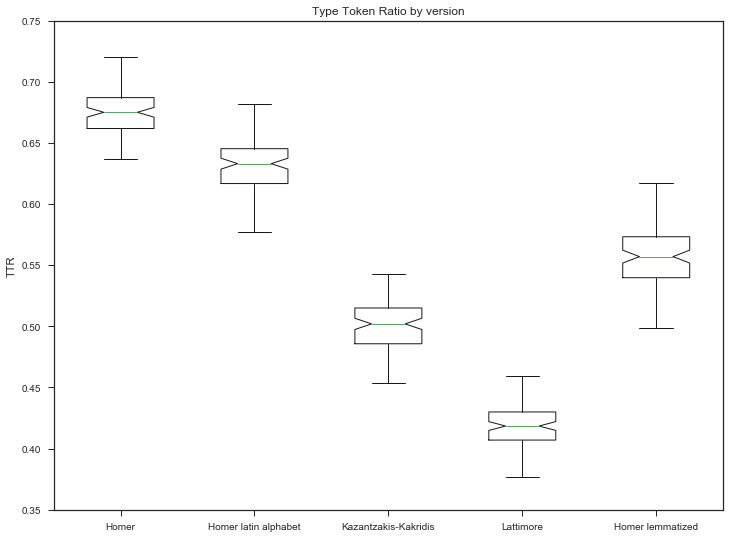

In [171]:
plt.boxplot([TTR_Homer, TTR_Homer_alphabet, TTR_KK_lem, TTR_RL_lem, TTR_H_lem], notch = True);

plt.xticks([1,2,3,4,5], np.array(['Homer', 'Homer latin alphabet', 
                                 'Kazantzakis-Kakridis', 'Lattimore',
                                 'Homer lemmatized']))
plt.ylabel('TTR');
plt.ylim((.35,.75))
plt.title('Type Token Ratio by version');
plt.show()